In [34]:
import os
import numpy as np
from osgeo import gdal
from matplotlib import pyplot as plt
from numpy import ma

In [35]:
#Want to load all of the data into numpy
files = os.listdir("./")
try:
    print("Cleaning directory.\n")
    files.remove("csv_test.py.ipynb")
    files.remove(".ipynb_checkpoints")
except ValueError:
    print("Nevermind, directory already clean.")

Cleaning directory.

Nevermind, directory already clean.


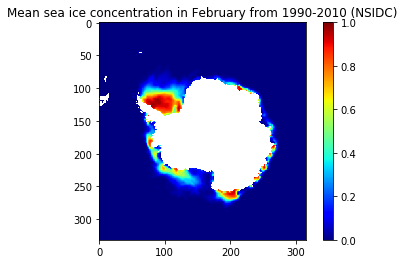

In [36]:
feb_data = []

#grabbing all files, appending to array datas
for file in files:
    if file[7] == "2": #checking month
        ds = gdal.Open(file)
        data = np.array(ds.GetRasterBand(1).ReadAsArray())
        feb_data.append(data)

#taking mean of dataset
feb_data = np.asarray(feb_data)
data = np.mean(feb_data,axis=0)

#masking NaNs(they are being set to max value)
data = np.ma.masked_where(data>2000,data)

#scaling down to 0.0-1.0 scale for ice concentration
maxval = np.max(data)
data = data*(1/maxval)

#plot array
plt.imshow(data, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.title("Mean sea ice concentration in February from 1990-2010 (NSIDC)")
plt.show()

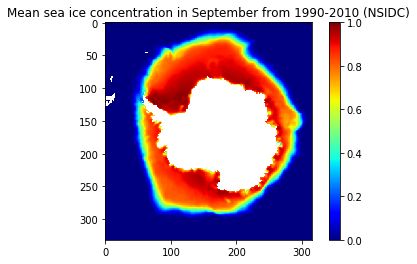

In [37]:
sep_data = []

#grabbing all files, appending to array datas
for file in files:
    if file[7] == "9": #checking month
        ds = gdal.Open(file)
        data = np.array(ds.GetRasterBand(1).ReadAsArray())
        sep_data.append(data)

#taking mean of dataset
sep_data = np.asarray(sep_data)
data = np.mean(sep_data,axis=0)

#masking NaNs(they are being set to max value)
data = np.ma.masked_where(data>2000,data)

#scaling down to 0.0-1.0 scale for ice concentration
maxval = np.max(data)
data = data*(1/maxval)

#plot array
plt.imshow(data, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.title("Mean sea ice concentration in September from 1990-2010 (NSIDC)")
plt.show()